In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from matplotlib import cm
from sklearn.metrics import silhouette_samples

# Silhouette analysis Iris data

Inną wewnętrzną miarą oceny jakości grupowania jest **silhouette analysis**, którą można również zastosować do algorytmów grupowania innych niż k-means. 

  * **silhouette analysis** może być wykorzystywana jako narzędzie graficzne do określenia jak elementy w grupach są blisko siebie. 
  * Aby obliczyć **silhouette coefficient** pojedynczej próbki w naszym zbiorze danych, możemy zastosować następujące trzy kroki:

       * Oblicz spójność klastra $a^{(i)}$ jako średnią odległość między punktem $x_i$ a wszystkimi innymi punktami w tym samym klastrze.
       * Oblicz poziom odseparowania klastra $b^{(i)}$ od najbliższego klastra jako średnią odległość między punktem $x_i$ a wszystkimi próbkami w najbliższej grupie.
       * Oblicz {\bf silhouette } $s^{(j)}$ jako różnicę między spójnością a separowalnością:
        $$
        s^{(j)} = \frac{b^{(j)} - a^{(j)}}{ \max( b^{(j)} , a^{(j)} ) }
        $$


  * **silhouette analysis** zawiera się w zakresie od $-1$ do $1$.
  * Na podstawie powyższego wzoru widać, że **silhouette coefficient** wynosi $0$ jeśli $ b^{(j)} = a^{(j)} $.
  * Co więcej, zbliżamy się do idealnego współczynnika **silhouette coefficient** równego  $1$ jeżeli ($b^{(i)} >> a^{(i)} $), ponieważ $b^{(i)}$ określa jak niepodobna jest próbka do innych klastrów, $a^{(i)}$ mówi nam jak podobna jest do innych próbek we własnym klastrze.

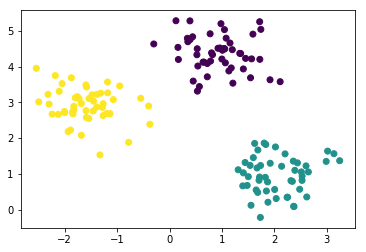

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

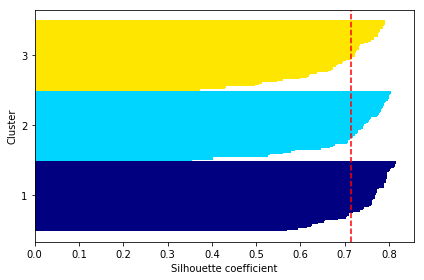

In [3]:
km = KMeans(n_clusters=3)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

  * Poprzez wizualną analizę wykresu możemy szybko przeanalizować rozmiary różnych klastrów i zidentyfikować klastry, które zawierają wartości odstające.

  * Jak widać na poprzednim wykresu **silhouette coefficient** nie są nawet bliskie zeru, co może wskazywać na dobre skupienie.

  * Ponadto, aby podsumować poprawność naszego grupowania, dodaliśmy **average silhouette coefficient** do wykresu (linia przerywana).

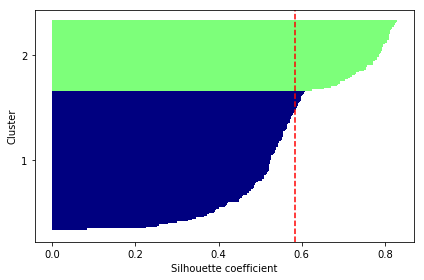

In [4]:
km = KMeans(n_clusters=2)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

  * Jak widać na wykresie  **silhouette coefficient** mają różne długości i szerokości, co wskazuje na nieoptymalne grupowanie.

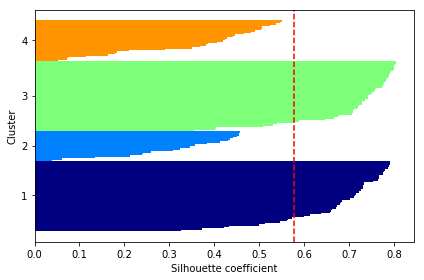

In [5]:
km = KMeans(n_clusters=4)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()